In [1]:
# Wczytaj dane z pliku JSON
import pandas as pd
import numpy as np

# Wczytaj dane z pliku JSON
df = pd.read_json('mileage.json')

# Przekształć kolumnę "Data" do formatu daty
df['Date'] = pd.to_datetime(df['Date'])
# Usuń nawiasy kwadratowe i cudzysłowy
df['Mileage'] = df['Mileage'].str.replace('[', '').str.replace(']', '').str.replace('\'', '')
# Przekształć kolumnę "Przebieg" do formatu liczbowego
df['Mileage'] = df['Mileage'].astype(int)

print(df[0:3])

                                            Filename       Date      Time  \
0  ../RentML/dataset/training/Osobowy\20210824_10... 2021-08-24  10:50:26   
1  ../RentML/dataset/training/Osobowy\20211029_17... 2021-10-29  17:55:36   
2  ../RentML/dataset/training/Osobowy\20211230_18... 2021-12-30  18:51:10   

   Mileage Type  
0   250284  car  
1   254410  car  
2   256163  car  


In [2]:
# Posortuj DataFrame według daty
df = df.sort_values('Date')

# Próba 3

# Prawie działa, poprawka

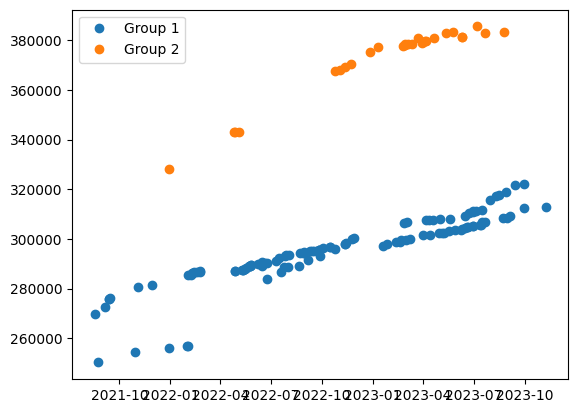

In [4]:
# ---
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Oblicz trend liniowy
x = np.array(range(len(df))).reshape(-1, 1)
y = df['Mileage'].values
model = LinearRegression().fit(x, y)
trend = model.predict(x)

# Oblicz odległość każdego punktu od linii trendu
distances = np.abs(y - trend)

# Podziel odległości na 2 grupy za pomocą K-Means
kmeans = KMeans(n_clusters=2, random_state=0).fit(distances.reshape(-1, 1))
df['group'] = kmeans.labels_

# Wyodrębnij grupy
group1 = df[df['group'] == 0]
group2 = df[df['group'] == 1]

# Wykres dla grupy 1
plt.plot(group1['Date'], group1['Mileage'], label='Group 1', linestyle='', marker='o')

# Wykres dla grupy 2
plt.plot(group2['Date'], group2['Mileage'], label='Group 2', linestyle='', marker='o')

# Dodaj legendę
plt.legend()

# Wyświetl wykres
plt.show()

# <center>Dataset poprawnie podzielony na 3 samochody

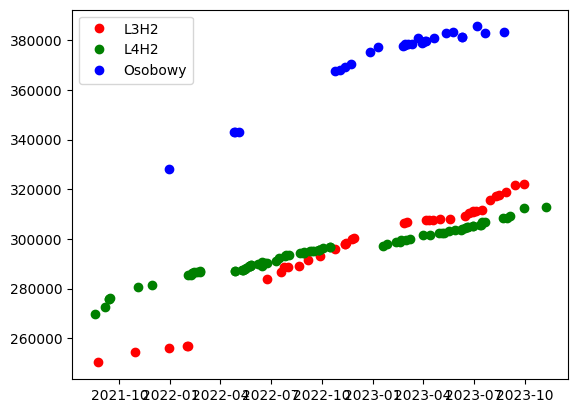

In [5]:
# Wyodrębnij podgrupy z grupy 1 na podstawie kolumny 'Type'
group1_car = group1[group1['Type'] == 'car']
group1_truck = group1[group1['Type'] == 'truck']

# Wykres dla grupy 1 typu car
plt.plot(group1_car['Date'], group1_car['Mileage'], label='L3H2', linestyle='', marker='o', color='red')

# Wykres dla grupy 1 typu truck
plt.plot(group1_truck['Date'], group1_truck['Mileage'], label='L4H2', linestyle='', marker='o', color='green')

# Wykres dla grupy 2
plt.plot(group2['Date'], group2['Mileage'], label='Osobowy', linestyle='', marker='o', color='blue')

# Dodaj legendę
plt.legend()

# Wyświetl wykres
plt.show()

# <center>Usuwanie outlierów

OUTLIERY

In [65]:
# Usuwanie outlierów
import pandas as pd

# Wybierz kolumnę, z której chcesz usunąć outlierów, na przykład 'mileage'
Q1 = df['Mileage'].quantile(0.25)
Q3 = df['Mileage'].quantile(0.75)
IQR = Q3 - Q1

# Usuń outlierów
df_no_outliers = df[~((df['Mileage'] < (Q1 - 1.3 * IQR)) | (df['Mileage'] > (Q3 + 1.3 * IQR)))]

In [66]:
# Oblicz trend liniowy między pierwszym a ostatnim punktem po usunięciu outlierów
start_mileage = df_no_outliers.iloc[0]['Mileage']
end_mileage = df_no_outliers.iloc[-1]['Mileage']
total_time = (df_no_outliers.iloc[-1]['Date'] - df_no_outliers.iloc[0]['Date']).days
slope = (end_mileage - start_mileage) / total_time

print(slope)

52.51231527093596


In [67]:
# Oblicz odchylenie każdego punktu od trendu po usunięciu outlierów
df_no_outliers['Trend'] = start_mileage + slope * (df_no_outliers['Date'] - df_no_outliers.iloc[0]['Date']).dt.days
df_no_outliers['Deviation'] = df_no_outliers['Mileage'] - df_no_outliers['Trend']

C:\Users\Dragon\AppData\Local\Temp\ipykernel_300\40324632.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['Trend'] = start_mileage + slope * (df_no_outliers['Data'] - df_no_outliers.iloc[0]['Data']).dt.days
C:\Users\Dragon\AppData\Local\Temp\ipykernel_300\40324632.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['Deviation'] = df_no_outliers['Przebieg'] - df_no_outliers['Trend']


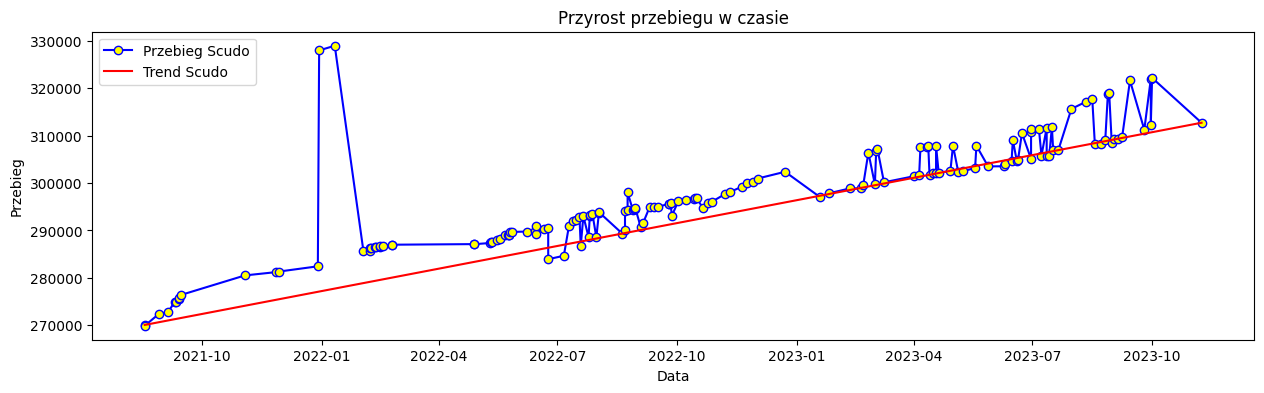

In [68]:
# Wykres + trend po usunięciu outlierów
import matplotlib.pyplot as plt

# Utwórz wykres
plt.figure(figsize=(15, 4))

# Wyrysuj dane z oznaczeniem punktów i zmienionym kolorem markerów
plt.plot(df_no_outliers['Date'], df_no_outliers['Mileage'], label='Przebieg Scudo', marker='o', color='blue', markerfacecolor='yellow')

# Wyrysuj linię trendu
plt.plot(df_no_outliers['Date'], df_no_outliers['Trend'], label='Trend Scudo', color='red')

# Dodaj legendę
plt.legend()

# Dodaj tytuły osi
plt.xlabel('Data')
plt.ylabel('Przebieg')

# Dodaj tytuł do wykresu
plt.title('Przyrost przebiegu w czasie')

# Wyświetl wykres
plt.show()